In [1]:
import os
import numpy as np

IMG_SIZE = (256,256)
BATCH_SIZE = 16
COLOR_MODE = 'grayscale'  


train_dir = 'data/train'
test_dir = 'data/test'


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode=COLOR_MODE,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode=COLOR_MODE,
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode=COLOR_MODE,
    shuffle=False
)


2024-05-23 18:10:20.389572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 18:10:20.389639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 18:10:20.391242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 18:10:20.398364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 18:10:21.139024: W tensorflow/compiler/tf2

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # Increase epochs for better training
)


2024-05-23 18:10:22.097342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 18:10:22.132332: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 18:10:22.132649: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/20


2024-05-23 18:10:23.063207: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-23 18:10:23.157247: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-23 18:10:23.890006: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-23 18:10:24.786415: I external/local_xla/xla/service/service.cc:168] XLA service 0x71daec817be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-23 18:10:24.786454: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-23 18:10:24.791205: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716468024.872202   86635 devic

260/260 [==============================] - 37s 121ms/step - loss: 0.4495 - accuracy: 0.7885 - val_loss: 0.3814 - val_accuracy: 0.8077
Epoch 2/20
260/260 [==============================] - 32s 121ms/step - loss: 0.3537 - accuracy: 0.8302 - val_loss: 0.3506 - val_accuracy: 0.8298
Epoch 3/20
260/260 [==============================] - 30s 114ms/step - loss: 0.3080 - accuracy: 0.8650 - val_loss: 0.3051 - val_accuracy: 0.8452
Epoch 4/20
260/260 [==============================] - 29s 111ms/step - loss: 0.2923 - accuracy: 0.8742 - val_loss: 0.3279 - val_accuracy: 0.8452
Epoch 5/20
260/260 [==============================] - 29s 110ms/step - loss: 0.2725 - accuracy: 0.8814 - val_loss: 0.2709 - val_accuracy: 0.8721
Epoch 6/20
260/260 [==============================] - 29s 111ms/step - loss: 0.2444 - accuracy: 0.8944 - val_loss: 0.2330 - val_accuracy: 0.8962
Epoch 7/20
260/260 [==============================] - 29s 113ms/step - loss: 0.2407 - accuracy: 0.8961 - val_loss: 0.2517 - val_accuracy: 0.8

In [4]:
from sklearn.metrics import classification_report, roc_auc_score


test_steps = np.ceil(test_generator.samples / test_generator.batch_size)


test_generator.reset()
predictions = model.predict(test_generator, steps=test_steps)
y_true = test_generator.classes
y_pred = (predictions > 0.5).astype(int).reshape(-1)


y_true = y_true[:len(y_pred)]

print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))


roc_auc = roc_auc_score(y_true, predictions[:len(y_true)])
print(f'ROC-AUC Score: {roc_auc}')


39/39 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

      NORMAL       0.86      0.69      0.76       234
   PNEUMONIA       0.83      0.93      0.88       390

    accuracy                           0.84       624
   macro avg       0.85      0.81      0.82       624
weighted avg       0.84      0.84      0.84       624

ROC-AUC Score: 0.9296515450361604


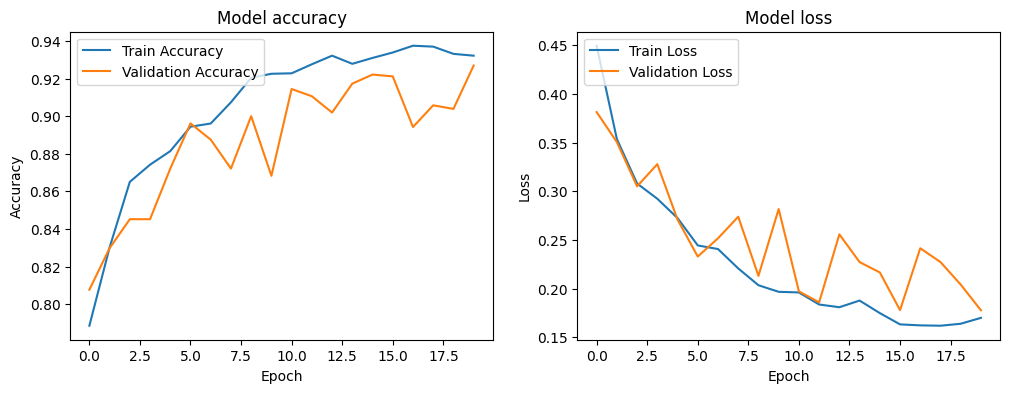

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


1/1 [==============================] - 0s 13ms/step


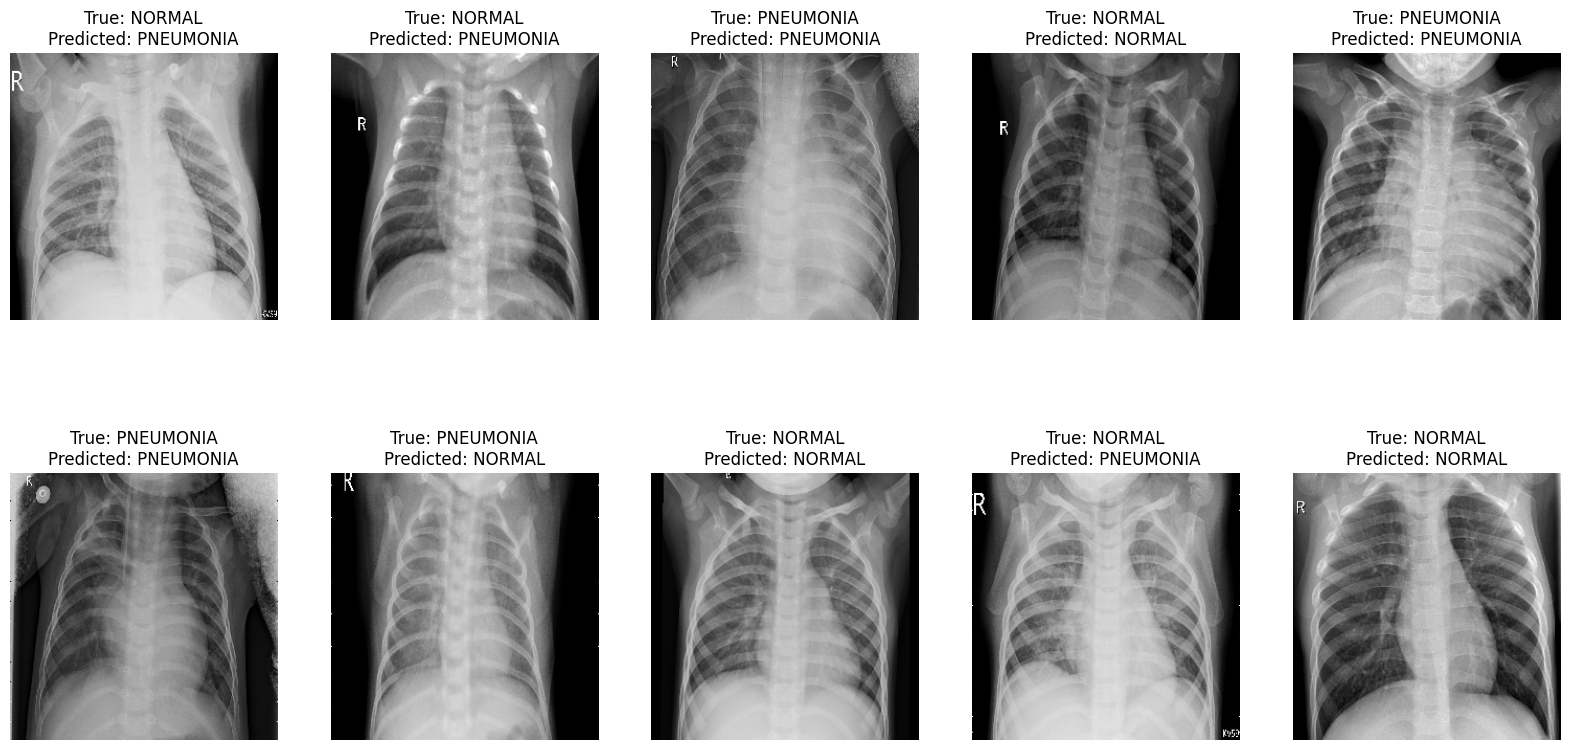

In [6]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load random test images and predict
test_images = [os.path.join(test_generator.directory, fname) for fname in test_generator.filenames]
random_images = random.sample(test_images, 10)

plt.figure(figsize=(20, 10))
for i, img_path in enumerate(random_images):
    img = load_img(img_path, target_size=IMG_SIZE, color_mode=COLOR_MODE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class = 'PNEUMONIA' if prediction > 0.5 else 'NORMAL'
    true_class = 'PNEUMONIA' if 'PNEUMONIA' in img_path else 'NORMAL'
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
    plt.axis('off')

plt.show()


## SHAP

/home/roronoa/ai/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
2024-05-23 18:20:23.772492: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 880.28MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-23 18:20:24.065121: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 880.28MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-23 18:20:25.741757: W external/local_tsl/tsl/framewor

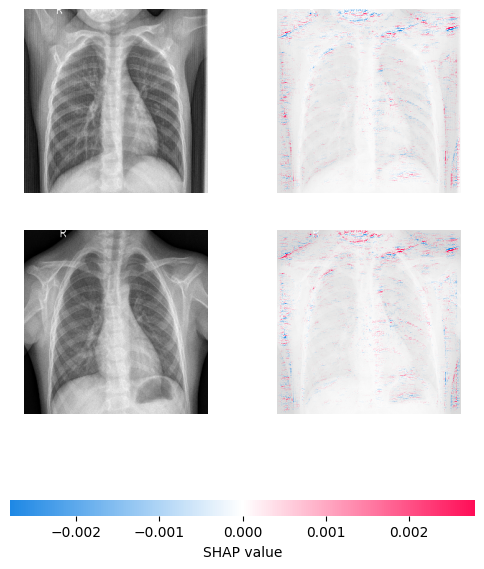

In [7]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test images and labels
x_test, _ = next(test_generator)

# Select a random index
random_index = np.random.randint(len(x_test))

# Select a single random image
x_test_single = x_test[random_index: random_index+2]

# Add batch dimension
#x_test_single = np.expand_dims(x_test_single, axis=0)

# Create a SHAP explainer using the GradientExplainer
explainer = shap.GradientExplainer(model, x_test_single)

# Calculate SHAP values for the single random image
shap_values_single = explainer.shap_values(x_test_single)

# Plot SHAP values for the single random image
shap.image_plot(shap_values_single, x_test_single)



## Weights and Biases

In [9]:
import numpy as np

# Iterate over the layers of the model
for layer in model.layers:
    # Check if the layer has trainable weights
    if layer.trainable:
        # Print the layer's name
        print(f'Layer: {layer.name}')
        
        # Get the weights and biases for the layer if available
        weights = layer.get_weights()
        
        # Check if weights exist for the layer
        if weights:
            # Unpack the weights (if available)
            weights, biases = weights
            
            # Print the shape of the weights and biases
            print(f'Weights shape: {weights.shape}')
            print(f'Biases shape: {biases.shape}')
            
            # Print the weights and biases
            print('Weights:')
            print(np.array(weights))
            print('Biases:')
            print(np.array(biases))
        else:
            print('No trainable weights for this layer')


Layer: conv2d
Weights shape: (3, 3, 1, 32)
Biases shape: (32,)
Weights:
[[[[-1.85725652e-02 -1.29298940e-01 -5.09974778e-01  7.20179360e-03
    -1.43284991e-01 -9.67738405e-02 -5.71875535e-02 -1.80954397e-01
     2.08787814e-01 -1.77910894e-01  2.12838519e-02 -1.70147538e-01
    -7.58658722e-02  7.09321946e-02 -2.38737720e-03  1.26059964e-01
     1.10915914e-01  1.77942663e-01 -1.29400223e-01  1.52549848e-01
     2.89812312e-02  1.81648165e-01 -1.12494446e-01 -3.24862413e-02
    -3.25420052e-01 -1.21012092e-01  3.42742503e-02  1.86220646e-01
     1.72907896e-02  7.57103488e-02  4.34068823e-03 -3.95182334e-02]]

  [[ 3.48446183e-02 -1.46657526e-01 -5.32727301e-01  1.54645652e-01
    -2.32913513e-02  1.29509956e-01  7.04376847e-02 -1.33047044e-01
    -6.91736629e-03 -1.45270541e-01  6.79495111e-02  2.40202658e-02
     5.56047298e-02  5.97997271e-02 -2.37025972e-02  9.35941935e-03
    -1.29749388e-01  9.87568647e-02 -9.35066864e-02 -1.05181262e-01
     4.03960310e-02 -2.44067665e-02  1.02

## LRP

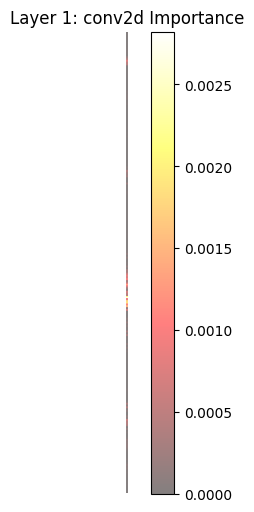

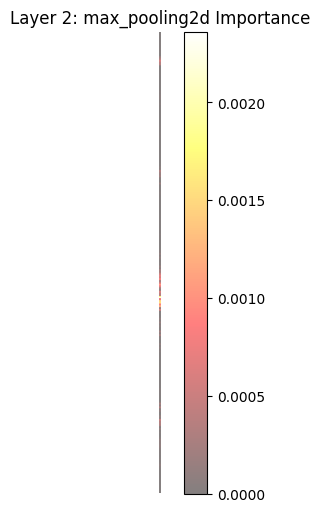

IndexError: index 2 is out of bounds for axis 0 with size 2

In [10]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Select a single random image from the test set
random_index = np.random.randint(len(x_test))
x_test_single = x_test[random_index: random_index+2]

# Create a SHAP explainer using the GradientExplainer
explainer = shap.GradientExplainer(model, x_test_single)

# Calculate SHAP values for the single random image
shap_values_single = explainer.shap_values(x_test_single)

# Iterate over each layer of the model
for layer_index, layer in enumerate(model.layers):
    # Get the SHAP values for the current layer
    shap_values_layer = shap_values_single[layer_index]
    
    # If the layer is not an input layer and has SHAP values
    if shap_values_layer is not None:
        # Sum the absolute SHAP values across all channels
        importance = np.sum(np.abs(shap_values_layer), axis=-1)
        
        # Plot the importance map for the current layer
        plt.figure(figsize=(6, 6))
        plt.imshow(importance[0], cmap='hot', alpha=0.5)
        plt.title(f'Layer {layer_index + 1}: {layer.name} Importance')
        plt.axis('off')
        plt.colorbar()
        plt.show()
